In [12]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["PYTHONWARNINGS"] = "ignore"

# Visualizations

In [14]:
import os
import pandas as pd

from virny.utils.custom_initializers import create_models_metrics_dct_from_database_df

from source.utils.db_functions import read_model_metric_dfs_from_db
from source.custom_classes.experiments_composer import ExperimentsComposer
from source.custom_classes.experiments_visualizer import ExperimentsVisualizer

## Initialize Configs

In [15]:
EXPERIMENT_NAME = 'stress_testing_nulls'
DB_COLLECTION_NAME = f'{EXPERIMENT_NAME}_results'
DATASET_NAME = 'Folktables_Income_GA_2018'
EXPERIMENT_SESSION_UUID = '6feaa1ae-df84-4ff3-8231-94945531e397'
SENSITIVE_ATTRS = ['SEX', 'RAC1P', 'AGEP', 'SEX&RAC1P&AGEP']
# PREPROCESSING_TECHNIQUES = ['cat: mode, num: median', 'cat: mode_trimmed_0.3, num: median']
PREPROCESSING_TECHNIQUES = ['cat: mode, num: mean']

In [16]:
# MODEL_NAMES = ['DecisionTreeClassifier', 'LogisticRegression', 'RandomForestClassifier',
#                'XGBClassifier', 'KNeighborsClassifier', 'MLPClassifier']
MODEL_NAMES = ['DecisionTreeClassifier', 'LogisticRegression']

In [17]:
from source.utils.db_functions import connect_to_mongodb

client, collection_obj, db_writer_func = connect_to_mongodb(DB_COLLECTION_NAME)

## Group Metrics Composition

In [18]:
model_metric_dfs = read_model_metric_dfs_from_db(collection_obj, EXPERIMENT_SESSION_UUID)
models_metrics_dct = create_models_metrics_dct_from_database_df(model_metric_dfs)
client.close()

In [19]:
models_metrics_dct[list(models_metrics_dct.keys())[0]].shape

(224, 27)

In [20]:
models_metrics_dct[list(models_metrics_dct.keys())[0]].head(20)

,Metric,Bootstrap_Model_Seed,Model_Name,Model_Params,Run_Number,Dataset_Name,Num_Estimators,Test_Set_Index,Tag,Record_Create_Date_Time,...,Injector_Config_Lst,AGEP_dis,AGEP_priv,RAC1P_dis,RAC1P_priv,SEX&RAC1P&AGEP_dis,SEX&RAC1P&AGEP_priv,SEX_dis,SEX_priv,overall
0,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_Income_GA_2018,10,0,OK,2023-04-24 14:43:12.198,...,"[0.1, 0.2, 0.4, 0.6, 0.8, 1.0]",0.756654,0.717133,0.779126,0.720764,0.802151,0.684136,0.754780,0.726291,0.7400
1,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_Income_GA_2018,10,1,OK,2023-04-24 14:43:12.217,...,"[0.1, 0.2, 0.4, 0.6, 0.8, 1.0]",0.757000,0.714286,0.776092,0.720764,0.802151,0.681303,0.754364,0.724749,0.7390
2,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_Income_GA_2018,10,2,OK,2023-04-24 14:43:12.230,...,"[0.1, 0.2, 0.4, 0.6, 0.8, 1.0]",0.755963,0.716184,0.777306,0.720465,0.800000,0.682720,0.754364,0.725135,0.7392
3,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_Income_GA_2018,10,3,OK,2023-04-24 14:43:12.242,...,"[0.1, 0.2, 0.4, 0.6, 0.8, 1.0]",0.749395,0.708590,0.773058,0.712112,0.797849,0.669972,0.747714,0.717810,0.7322
4,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_Income_GA_2018,10,4,OK,2023-04-24 14:43:12.254,...,"[0.1, 0.2, 0.4, 0.6, 0.8, 1.0]",0.740062,0.700047,0.767597,0.701372,0.808602,0.667139,0.737323,0.710100,0.7232
5,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_Income_GA_2018,10,5,OK,2023-04-24 14:43:12.265,...,"[0.1, 0.2, 0.4, 0.6, 0.8, 1.0]",0.738334,0.685809,0.755461,0.696897,0.795699,0.658640,0.729011,0.704318,0.7162
6,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_Income_GA_2018,10,6,OK,2023-04-24 14:43:12.276,...,"[0.1, 0.2, 0.4, 0.6, 0.8, 1.0]",0.730384,0.672046,0.745752,0.686158,0.793548,0.633144,0.719451,0.693138,0.7058
14,Accuracy,102,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_2,Folktables_Income_GA_2018,10,0,OK,2023-04-24 14:45:39.878,...,"[0.1, 0.2, 0.4, 0.6, 0.8, 1.0]",0.769443,0.716659,0.757888,0.741945,0.806452,0.709632,0.761845,0.733616,0.7472
15,Accuracy,102,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_2,Folktables_Income_GA_2018,10,1,OK,2023-04-24 14:45:39.892,...,"[0.1, 0.2, 0.4, 0.6, 0.8, 1.0]",0.769098,0.713811,0.756675,0.740453,0.806452,0.706799,0.761014,0.731689,0.7458
16,Accuracy,102,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_2,Folktables_Income_GA_2018,10,2,OK,2023-04-24 14:45:39.907,...,"[0.1, 0.2, 0.4, 0.6, 0.8, 1.0]",0.768061,0.709065,0.754854,0.737470,0.808602,0.698300,0.758520,0.728990,0.7432


In [21]:
exp_composer = ExperimentsComposer(models_metrics_dct, SENSITIVE_ATTRS)
exp_subgroup_metrics_dct = exp_composer.create_exp_subgroup_metrics_dct()

In [22]:
exp_avg_group_metrics_dct = exp_composer.compose_group_metrics(exp_subgroup_metrics_dct)

## Metrics Visualization and Reporting

In [23]:
visualizer = ExperimentsVisualizer(exp_subgroup_metrics_dct=exp_subgroup_metrics_dct,
                                   exp_avg_runs_group_metrics_dct=exp_avg_group_metrics_dct,
                                   dataset_name=DATASET_NAME,
                                   model_names=MODEL_NAMES,
                                   sensitive_attrs=SENSITIVE_ATTRS)

In [24]:
visualizer.melted_exp_avg_runs_subgroup_metrics_dct[MODEL_NAMES[0]][PREPROCESSING_TECHNIQUES[0]]['Exp_iter_1'][0.8]

,Metric,Model_Name,Num_Estimators,Test_Set_Index,Dataset_Split_Seed,Model_Init_Seed,Subgroup,Metric_Value
0,Accuracy,DecisionTreeClassifier,10.0,5.0,100.0,100.0,AGEP_dis,0.743173
1,Entropy,DecisionTreeClassifier,10.0,5.0,100.0,100.0,AGEP_dis,0.000000
2,F1,DecisionTreeClassifier,10.0,5.0,100.0,100.0,AGEP_dis,0.500575
3,FNR,DecisionTreeClassifier,10.0,5.0,100.0,100.0,AGEP_dis,0.607368
4,FPR,DecisionTreeClassifier,10.0,5.0,100.0,100.0,AGEP_dis,0.085435
...,...,...,...,...,...,...,...,...
139,Positive-Rate,DecisionTreeClassifier,10.0,5.0,100.0,100.0,overall,0.603252
140,Selection-Rate,DecisionTreeClassifier,10.0,5.0,100.0,100.0,overall,0.222600
141,Std,DecisionTreeClassifier,10.0,5.0,100.0,100.0,overall,0.138173
142,TNR,DecisionTreeClassifier,10.0,5.0,100.0,100.0,overall,0.893819


In [25]:
visualizer.melted_exp_avg_runs_group_metrics_dct[MODEL_NAMES[0]][PREPROCESSING_TECHNIQUES[0]]['Exp_iter_1'][0.8].head(1000)

,Metric,Model_Name,Group,Metric_Value
0,Equalized_Odds_TPR,DecisionTreeClassifier,SEX,-0.419431
1,Equalized_Odds_FPR,DecisionTreeClassifier,SEX,-0.168441
2,Disparate_Impact,DecisionTreeClassifier,SEX,0.275702
3,Statistical_Parity_Difference,DecisionTreeClassifier,SEX,-0.607104
4,Accuracy_Parity,DecisionTreeClassifier,SEX,0.024549
5,Label_Stability_Ratio,DecisionTreeClassifier,SEX,1.182698
6,IQR_Parity,DecisionTreeClassifier,SEX,-0.012485
7,Std_Parity,DecisionTreeClassifier,SEX,-0.013452
8,Std_Ratio,DecisionTreeClassifier,SEX,0.907001
9,Jitter_Parity,DecisionTreeClassifier,SEX,-0.074660


### Subgroup metrics per dataset, experiment iteration, and model

In [26]:
visualizer.create_subgroups_grid_pct_lines_plot(model_name=MODEL_NAMES[0],
                                                target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                subgroup_metrics_type='variance')

alt.VConcatChart(...)

In [27]:
visualizer.create_subgroups_grid_pct_lines_plot(model_name=MODEL_NAMES[1],
                                                target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                subgroup_metrics_type='error')

alt.VConcatChart(...)

### Group metrics per dataset and model

In [28]:
visualizer.create_groups_grid_pct_lines_plot(model_name=MODEL_NAMES[0],
                                             target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                             group_metrics_type='variance')

alt.VConcatChart(...)

In [29]:
visualizer.create_groups_grid_pct_lines_plot(model_name=MODEL_NAMES[0],
                                             target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                             group_metrics_type='fairness')

alt.VConcatChart(...)

### Specific subgroup metric per dataset and multiple models

In [31]:
visualizer.create_subgroups_grid_pct_lines_per_model_plot(subgroup_metric='Jitter',
                                                          target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                          model_names=MODEL_NAMES)

alt.VConcatChart(...)

In [32]:
visualizer.create_subgroups_grid_pct_lines_per_model_plot(subgroup_metric='F1',
                                                          target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                          model_names=MODEL_NAMES)

alt.VConcatChart(...)

### Specific group metric per dataset, experiment iteration, and multiple models

In [33]:
visualizer.create_groups_grid_pct_lines_per_model_plot(group_metric='Label_Stability_Ratio',
                                                       target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                       model_names=MODEL_NAMES[:2])

alt.VConcatChart(...)

In [34]:
visualizer.create_groups_grid_pct_lines_per_model_plot(group_metric='Disparate_Impact',
                                                       target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                       model_names=MODEL_NAMES[:2])

alt.VConcatChart(...)

### Specific subgroup metric per dataset, one model, and multiple preprocessing techniques

In [35]:
visualizer.create_subgroups_grid_pct_lines_per_model_and_preprocessing_plot(subgroup_metric='Jitter', model_name=MODEL_NAMES[0])

alt.VConcatChart(...)

### Box plots for subgroup metrics per model and experiment iteration

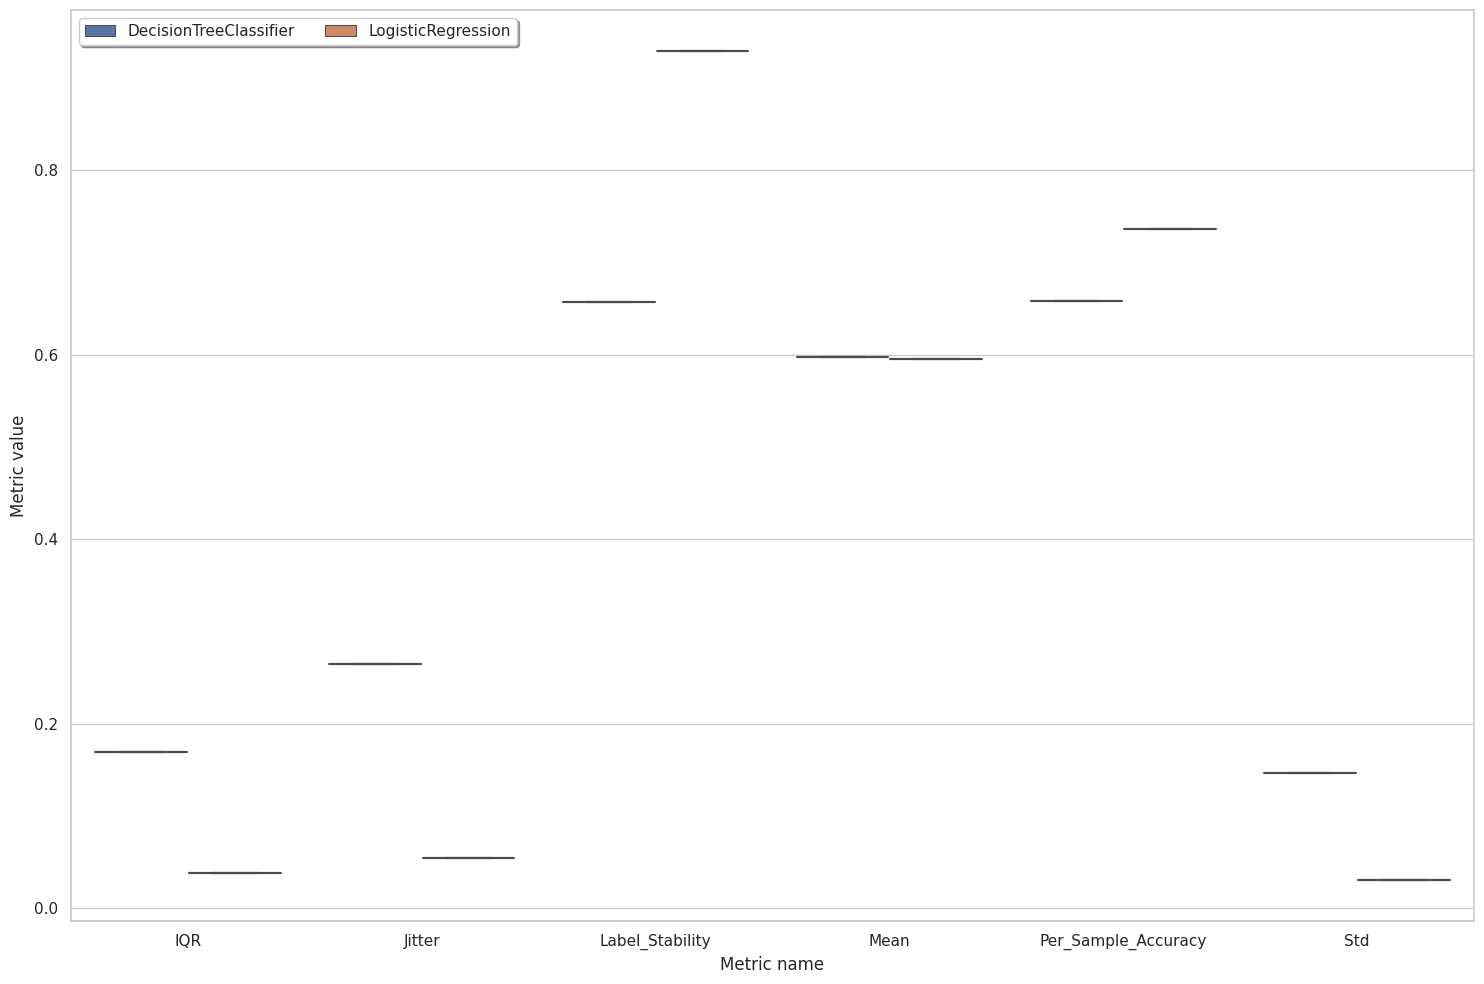

In [36]:
visualizer.create_subgroup_metrics_box_plot_for_multiple_exp_iters(target_percentage=1.0,
                                                                   target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                                   subgroup_metrics_type='variance')

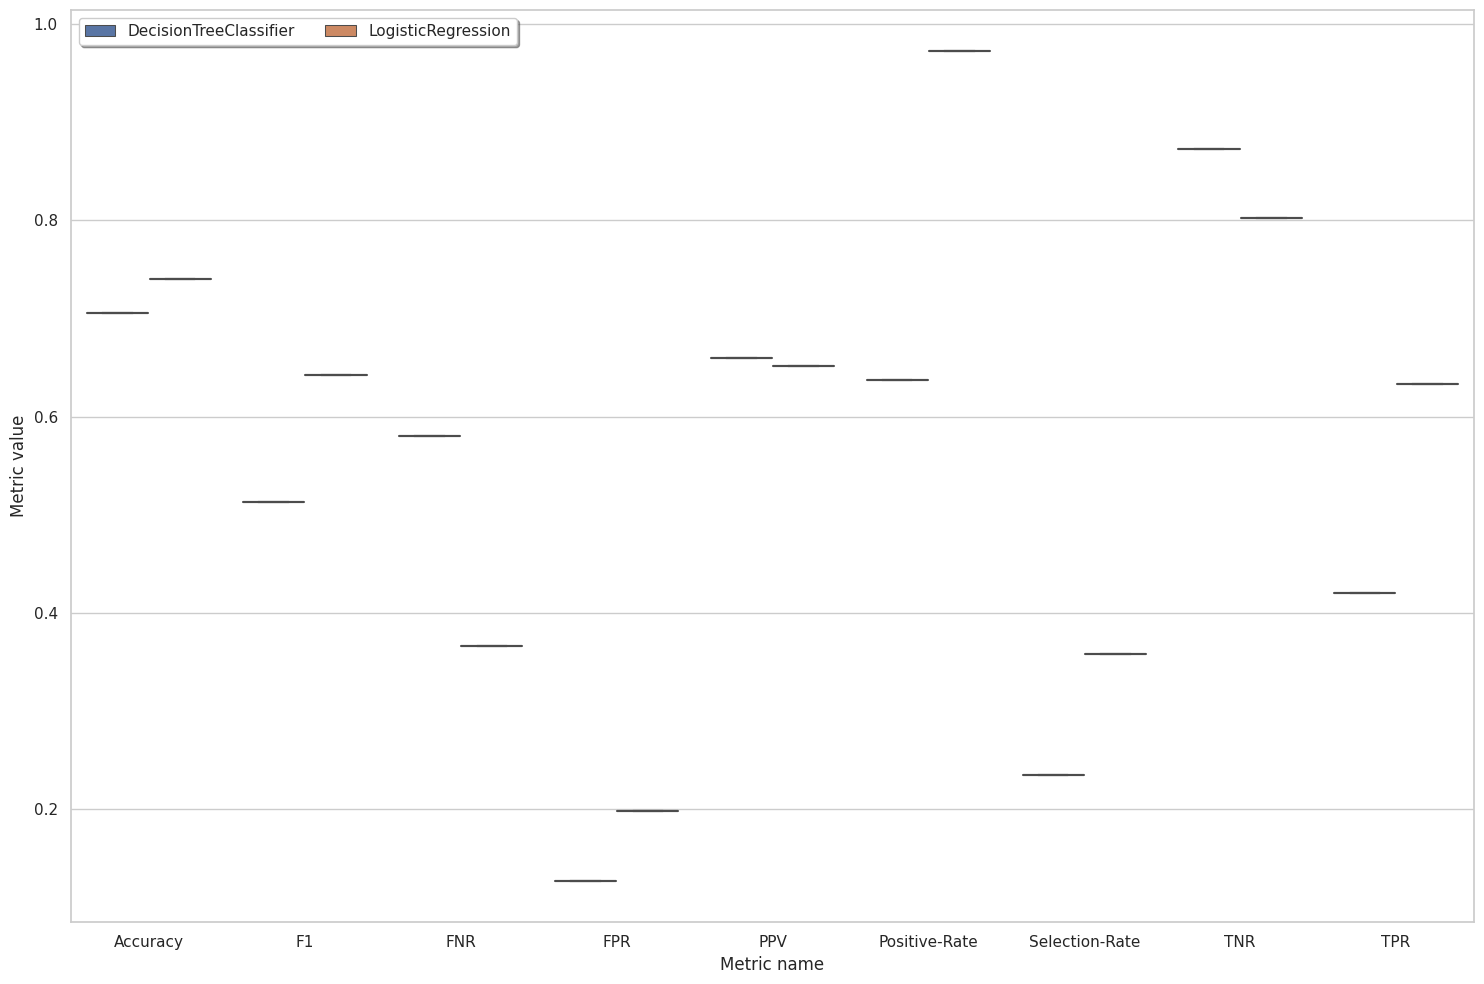

In [37]:
visualizer.create_subgroup_metrics_box_plot_for_multiple_exp_iters(target_percentage=1.0,
                                                                   target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                                   subgroup_metrics_type='error')

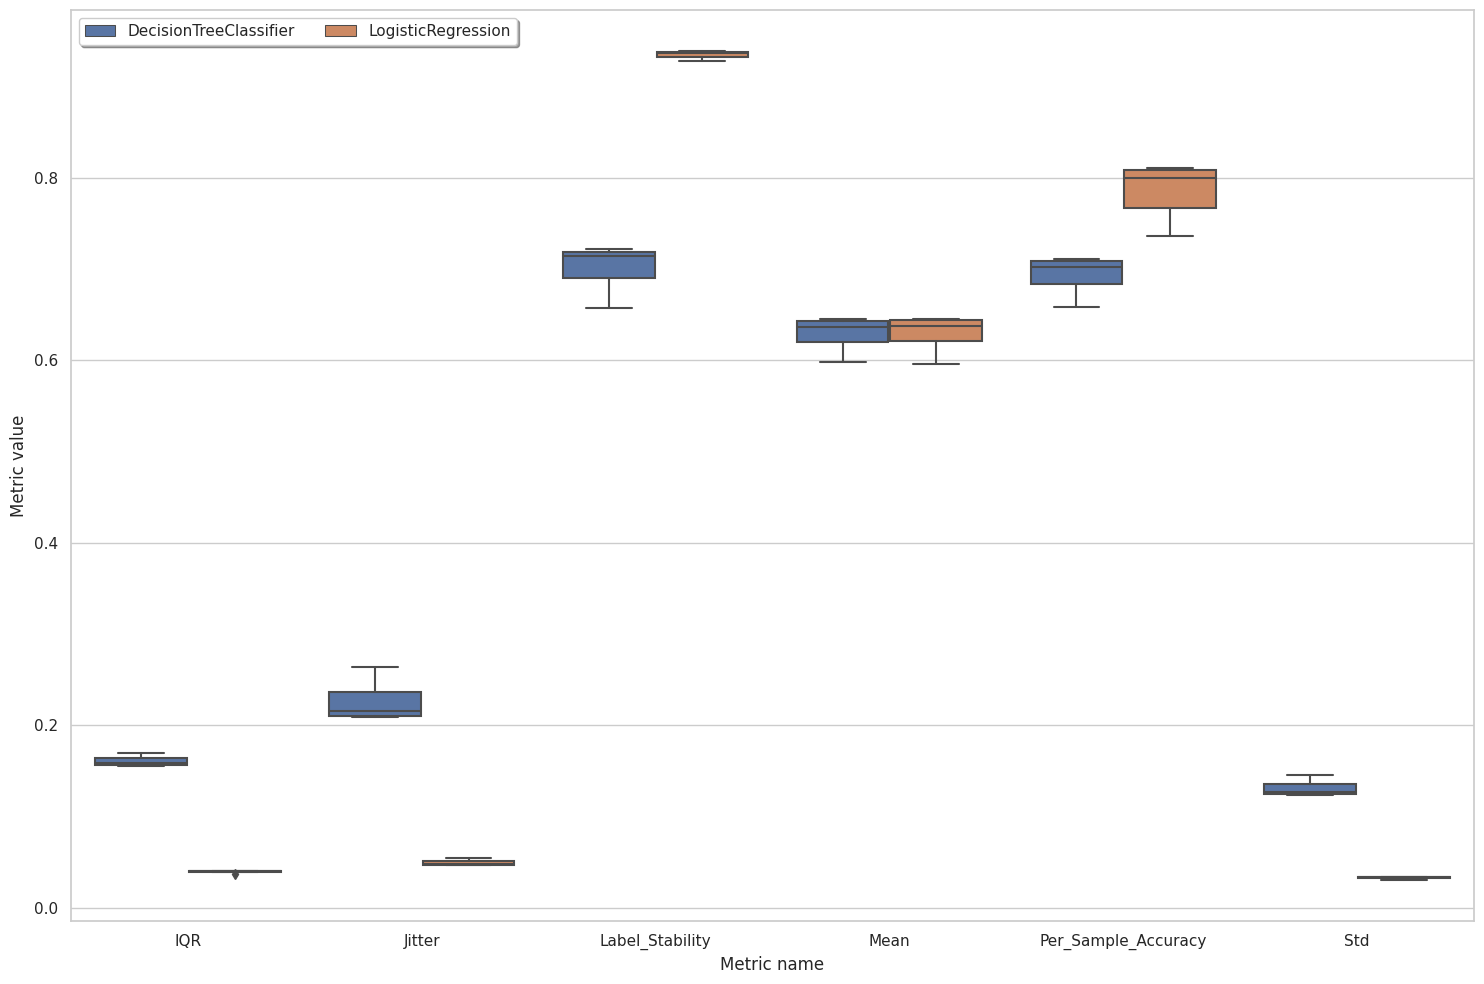

In [38]:
visualizer.create_subgroup_metrics_box_plot_for_multiple_percentages(target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                                     subgroup_metrics_type='variance')

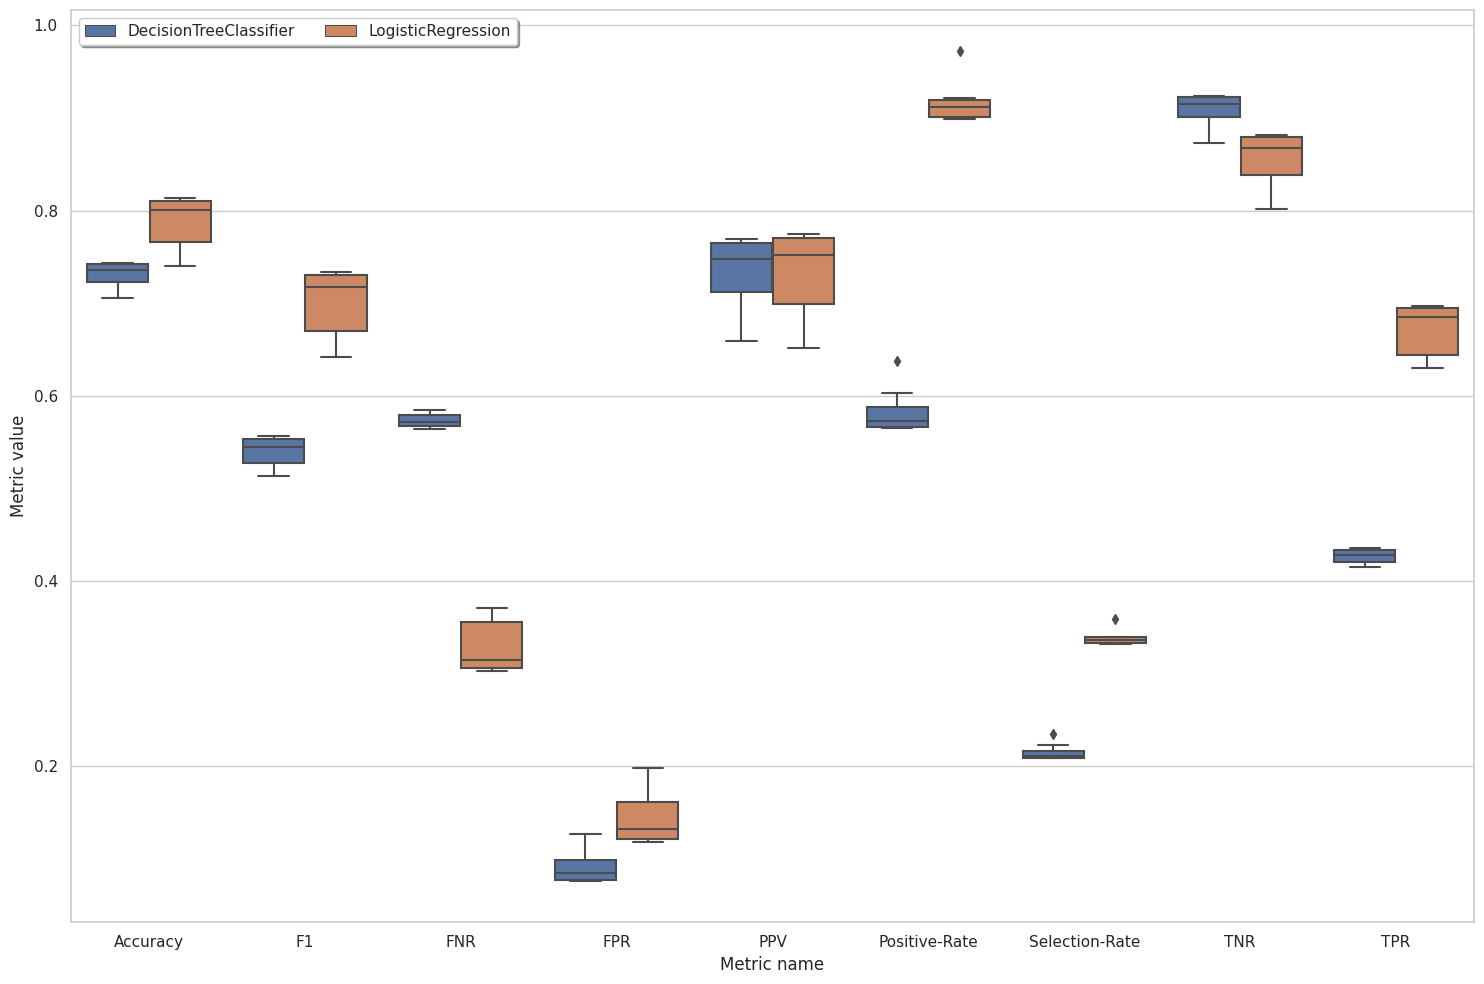

In [39]:
visualizer.create_subgroup_metrics_box_plot_for_multiple_percentages(target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                                     subgroup_metrics_type='error')

In [40]:
visualizer.melted_exp_avg_exp_iters_avg_runs_subgroup_metrics_dct[MODEL_NAMES[0]][PREPROCESSING_TECHNIQUES[0]][1.0].head(1000)

,Model_Name,Test_Set_Index,Metric,Subgroup,Num_Estimators,Metric_Value,Percentage,Preprocessing_Technique
0,DecisionTreeClassifier,6.0,Accuracy,AGEP_dis,10.0,0.732285,1.0,"cat: mode, num: mean"
1,DecisionTreeClassifier,6.0,Accuracy,AGEP_priv,10.0,0.669673,1.0,"cat: mode, num: mean"
2,DecisionTreeClassifier,6.0,Accuracy,RAC1P_dis,10.0,0.742112,1.0,"cat: mode, num: mean"
3,DecisionTreeClassifier,6.0,Accuracy,RAC1P_priv,10.0,0.688097,1.0,"cat: mode, num: mean"
4,DecisionTreeClassifier,6.0,Accuracy,SEX&RAC1P&AGEP_dis,10.0,0.796774,1.0,"cat: mode, num: mean"
...,...,...,...,...,...,...,...,...
139,DecisionTreeClassifier,6.0,TPR,SEX&RAC1P&AGEP_dis,10.0,0.051546,1.0,"cat: mode, num: mean"
140,DecisionTreeClassifier,6.0,TPR,SEX&RAC1P&AGEP_priv,10.0,0.768170,1.0,"cat: mode, num: mean"
141,DecisionTreeClassifier,6.0,TPR,SEX_dis,10.0,0.112045,1.0,"cat: mode, num: mean"
142,DecisionTreeClassifier,6.0,TPR,SEX_priv,10.0,0.614943,1.0,"cat: mode, num: mean"
